In [15]:
#import libraries
import pickle as pkl
import matplotlib as plt
import numpy as np
import umap
import sklearn as skl

#write some code to read a pkl file and print and assess its contents, and print the data to check if the data is in the correct format
def read_pkl(file_path):
    try:
        with open(file_path, 'rb') as file:
            data = pkl.load(file)
            print("Data loaded successfully.")
            print("Type of data:", type(data))
            print("Keys in data (if dict):", data.keys() if isinstance(data, dict) else "N/A")
            return data
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

data= read_pkl('z.pkl')
print(data)

# Define convert_to_numpy function
def convert_to_numpy(data):
    if isinstance(data, np.ndarray):
        return data
    else:
        return np.array(data)

# Define check_dimensionality function
def check_dimensionality(array):
    return array.ndim

#convert the data to a numpy array and check its dimensionality
data_array = convert_to_numpy(data)
print("Shape of data array:", data_array.shape)
print("Dimensionality of data array:", check_dimensionality(data_array))

Data loaded successfully.
Type of data: <class 'numpy.ndarray'>
Keys in data (if dict): N/A
[[-2.03126352e-02  6.34804845e-01  4.91202399e-02 ... -1.63854170e+00
  -2.69352078e+00  5.61744943e-02]
 [-5.63507667e-03  1.07312016e-01  5.82012534e-03 ... -2.83108950e-01
   7.78612792e-01 -3.97261232e-03]
 [-1.72514096e-02  1.90454483e+00 -4.35419641e-02 ...  7.08500147e-01
   1.37315464e+00  6.57598749e-02]
 ...
 [ 4.80402261e-03  1.96924055e+00  4.56955656e-02 ...  6.52178168e-01
   1.69901335e+00  1.19481362e-01]
 [ 2.46408163e-03 -5.10572612e-01 -5.36172464e-03 ...  3.39178324e-01
  -1.96947694e-01  2.86529511e-02]
 [-2.23045629e-02 -9.77793038e-01 -7.05256686e-03 ...  5.35139501e-01
   3.76032889e-02 -8.27234238e-03]]
Shape of data array: (204000, 8)
Dimensionality of data array: 2


In [24]:
#create a subset of the data and print the first 10 samples
def create_subset(data, num_samples=10):
    if isinstance(data, np.ndarray):
        return data[:num_samples]
    else:
        return np.array(data)[:num_samples]
subset_data = create_subset(data_array, 10)
print("Subset of data (first 10 samples):")
print(subset_data)

Subset of data (first 10 samples):
[[-2.03126352e-02  6.34804845e-01  4.91202399e-02 -2.88585178e-03
  -7.52725974e-02 -1.63854170e+00 -2.69352078e+00  5.61744943e-02]
 [-5.63507667e-03  1.07312016e-01  5.82012534e-03  1.76328281e-03
   1.19400155e-02 -2.83108950e-01  7.78612792e-01 -3.97261232e-03]
 [-1.72514096e-02  1.90454483e+00 -4.35419641e-02 -5.56291230e-02
  -4.23848331e-02  7.08500147e-01  1.37315464e+00  6.57598749e-02]
 [ 2.75274385e-02  1.83976769e-01  1.18060103e-02  5.72993699e-03
  -1.29901636e-02 -7.03547418e-01  3.21502209e-01 -1.62674114e-05]
 [ 5.88624366e-02  2.83163041e-02  3.92393433e-02  1.75739788e-02
  -2.87650842e-02 -1.41330492e+00 -2.58635491e-01  1.85830630e-02]
 [ 4.32322323e-02  8.53047073e-01  4.28178832e-02  2.18655951e-02
  -4.31404933e-02 -1.42006040e+00  3.10731530e-01  3.31189334e-02]
 [ 1.76538620e-02  1.00560880e+00  2.88353935e-02  3.69645841e-02
  -4.95177582e-02 -1.10702848e+00  8.70715305e-02  5.02568632e-02]
 [-2.11869385e-02  1.01073429e-01 

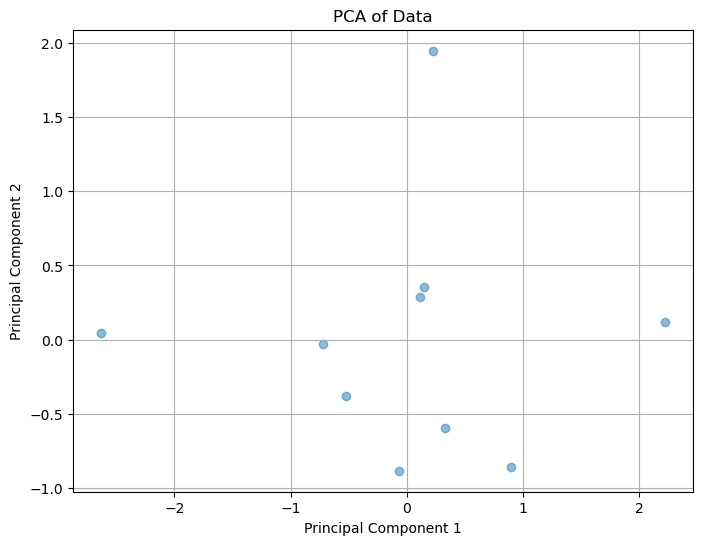

In [26]:
#perform a principal component analysis (PCA) on the subset data and plot the results in 2D
def perform_pca(data, n_components=2):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    return transformed_data
def plot_pca(transformed_data):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
    plt.title('PCA of Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()
transformed_data = perform_pca(subset_data)
plot_pca(transformed_data)